# Logistic Regression for SMS Spam Detection 📱

This notebook trains and evaluates a **Logistic Regression** model to classify SMS messages as **spam** or **ham** (not spam), based on text features.

**Date:** April 03, 2025


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Load training and testing samples
train_df = pd.read_csv("training.txt")
test_df = pd.read_csv("testing.txt")

# Show sample
train_df.head()


,body,cleaned_body,label,tokens
0,Subject: off site with john griebling ' s opti...,subject off site with john griebling s optical...,0,"['subject', 'site', 'john', 'griebling', 'opti..."
1,Author: metze\nDate: 2007-04-27 14:23:08 +0000...,author metze new revision websvn log pass down...,0,"['author', 'metze', 'new', 'revision', 'websvn..."
2,"with the holidays quickly approaching , enron ...",with the holidays quickly approaching enron tr...,0,"['holiday', 'quickly', 'approaching', 'enron',..."
3,The Bayesian AI group at Monash University is ...,the bayesian ai group at monash university is ...,0,"['bayesian', 'ai', 'group', 'monash', 'univers..."
4,Mike Meyer wrote:\n> Trying to install it from...,mike meyer wrote trying to install it from the...,0,"['mike', 'meyer', 'wrote', 'trying', 'install'..."


In [12]:
# Extract features and labels
X_train_text = train_df["cleaned_body"]
y_train = train_df["label"]
X_test_text = test_df["cleaned_body"]
y_test = test_df["label"]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)


In [13]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]


In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")


Accuracy:  0.9780
Precision: 0.9739
Recall:    0.9798
F1 Score:  0.9768
AUC:       0.9970


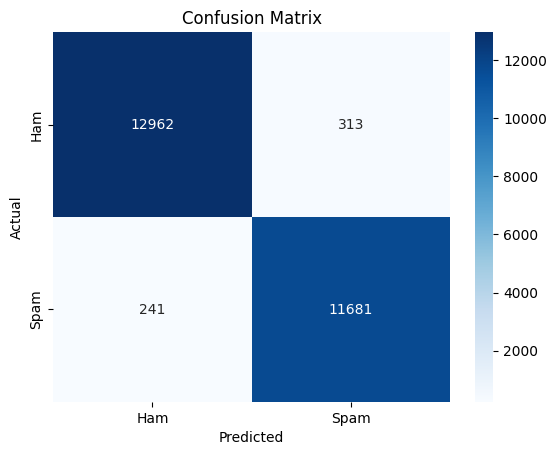

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


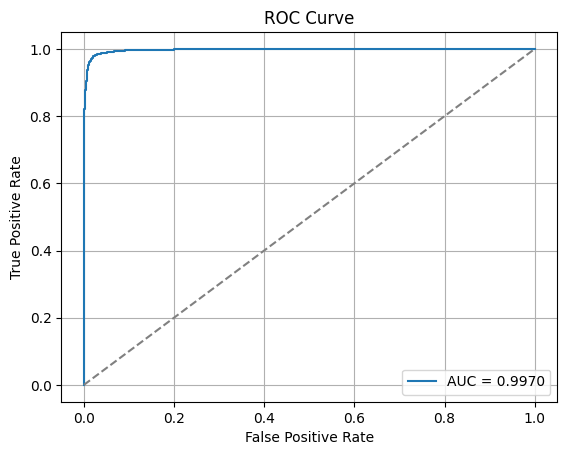

In [16]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
